# Analysis of Sales - Maven Roasters
### Dataset can be found on Kaggle [https://www.kaggle.com/datasets/f02d450f34d1dda2c29da2c31e4650dd98562f4887f4dbb1b7b3cd9ec3348191]

In [1]:
# import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## First, what's in the dataset?
### transaction dates, time, quantity, store locations, product ids, price, categories, types, and details

In [2]:
# create coffee_df, don't forget to pip install/conda openpyxl 

coffee_df = pd.read_excel('Coffee Shop Sales.xlsx', index_col=0) #index col to 0 to use 'transaction_id' as the index
coffee_df.head()

,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
transaction_id,,,,,,,,,,
1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [3]:
# info about coffee_df

print(coffee_df.info())

# 'product_id' is int64, I want to make it an object since it's qualitative

<class 'pandas.core.frame.DataFrame'>
Index: 149116 entries, 1 to 149456
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_date  149116 non-null  datetime64[ns]
 1   transaction_time  149116 non-null  object        
 2   transaction_qty   149116 non-null  int64         
 3   store_id          149116 non-null  int64         
 4   store_location    149116 non-null  object        
 5   product_id        149116 non-null  int64         
 6   unit_price        149116 non-null  float64       
 7   product_category  149116 non-null  object        
 8   product_type      149116 non-null  object        
 9   product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 12.5+ MB
None


In [4]:
# Turn 'product_id' into an object
coffee_df['product_id'] = coffee_df['product_id'].astype(object)

## Total transactions per location, who sells the most?
### Hell's Kitchen sells the most, followed closely by Astoria, and Lower Manhattan trails behind by ~3000 transactions

store_location
Hell's Kitchen     50735
Astoria            50599
Lower Manhattan    47782
Name: count, dtype: int64


(47000.0, 51000.0)

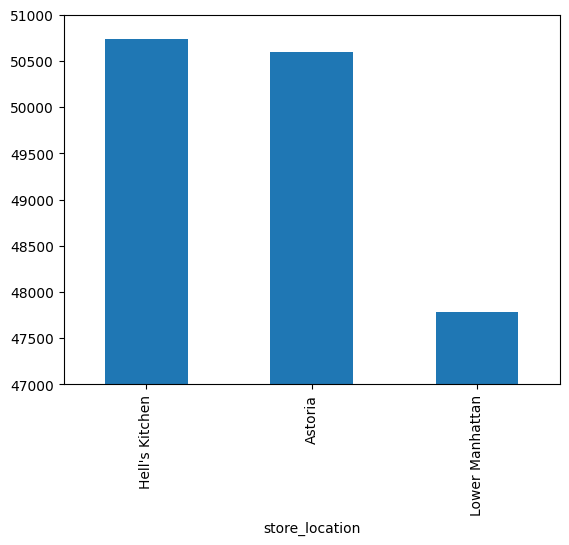

In [5]:
# transaction counts of every location

print(coffee_df['store_location'].value_counts())

# Plot it out

coffee_df['store_location'].value_counts().plot(kind = 'bar')
plt.ylim(47000,51000)

## What category has the most transactions?
### Coffee transaction numbers are the most (makes sense) with Tea trailing behind, by under 13,000 sales, and then Bakery, trailing behind at just under 23,000, half of Tea's 45,500 sales. Brand Chocolate is last at 487.

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64


C:\Users\emagp\AppData\Local\Temp\ipykernel_14744\2619465273.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(value_counts.index, rotation = 45)


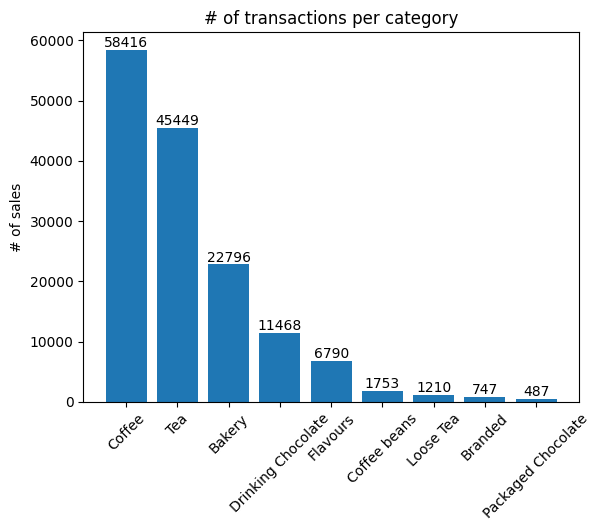

In [6]:
# Plot out # of transactions per category

fig, ax = plt.subplots()
value_counts = coffee_df['product_category'].value_counts()
bar_container = ax.bar(value_counts.index, value_counts.values)
ax.set(ylabel = '# of sales', title = '# of transactions per category')
ax.set_xticklabels(value_counts.index, rotation = 45)
ax.bar_label(bar_container)
print(value_counts)

### Since people can order a varied amount of each product per transaction, we need to find the overall quantity of product sold per category, and use that to find the average quantity sold per transaction for each category.

C:\Users\emagp\AppData\Local\Temp\ipykernel_14744\3569547820.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sum_quantity_counts.index, rotation = 45)


product_category
Coffee                89250
Tea                   69737
Bakery                23214
Drinking Chocolate    17457
Flavours              10511
Coffee beans           1828
Loose Tea              1210
Branded                 776
Packaged Chocolate      487
Name: transaction_qty, dtype: int64


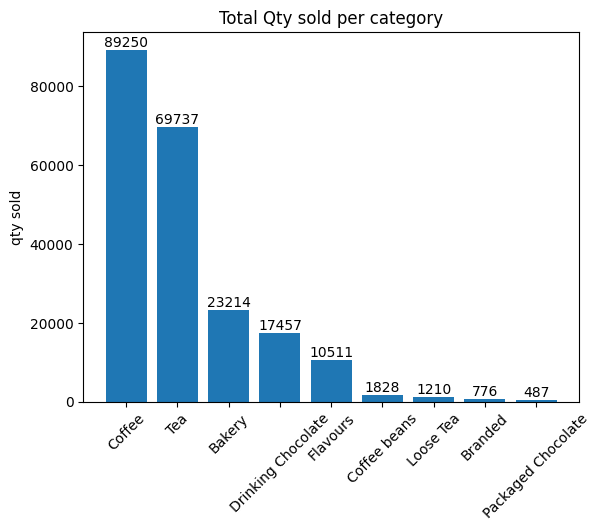

In [7]:
# However, quantities per transaction can vary, so have to add up transaction_qty per category

fig1, ax1 = plt.subplots()
sum_quantity_counts = coffee_df.groupby('product_category')['transaction_qty'].sum()
sum_quantity_counts = sum_quantity_counts.sort_values(ascending= False)
bar_container1 = ax1.bar(sum_quantity_counts.index, sum_quantity_counts.values)
ax1.set(ylabel = 'qty sold', title = 'Total Qty sold per category')
ax1.set_xticklabels(sum_quantity_counts.index, rotation = 45)
ax1.bar_label(bar_container1)
print(sum_quantity_counts)

## Per transaction, what category has the highest quantity per transaction?
### Flavours has an average of 1.55 qty per transaction, followed closely by Tea, then Coffee.

In [8]:
# Average quantity of each transaction per category

avg_qty_per_transaction = sum_quantity_counts/value_counts
avg_qty_per_transaction= avg_qty_per_transaction.sort_values(ascending=False)
avg_qty_per_transaction

product_category
Flavours              1.548012
Tea                   1.534401
Coffee                1.527835
Drinking Chocolate    1.522236
Coffee beans          1.042784
Branded               1.038822
Bakery                1.018337
Loose Tea             1.000000
Packaged Chocolate    1.000000
dtype: float64

## Let's Talk Money
## What category has contributed the most to the overall revenue?
### Coffee has contributed the most, with it accounting for 38.6% of the overall revenue, Tea accounting for 28.1%, and then Baking accounting for 11.8%.

In [9]:
# Create 'transaction_total' column to calculate total of transaction, multiplies transaction_qty by unit_price

coffee_df['transaction_total'] = coffee_df['transaction_qty'] * coffee_df['unit_price']
coffee_df.head()

,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_total
transaction_id,,,,,,,,,,,
1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0
2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2
3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0
4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0
5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2


In [10]:
# Save the new coffee_df as a new csv, the new column could prove useful for more complex analyses.
coffee_df.to_csv("coffee2_df")

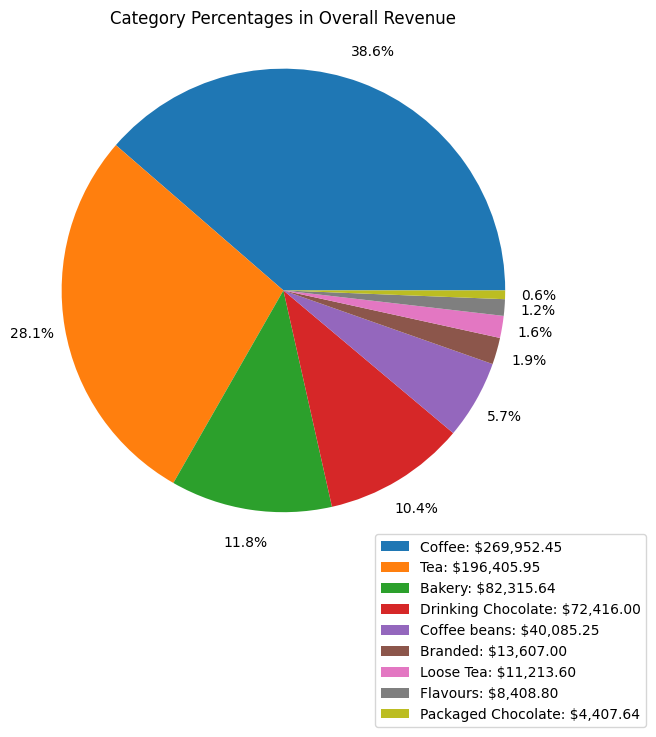

In [11]:
# Use a pie chart to see what category has contributed the most

fig3, ax3 = plt.subplots()

# Find the sums of transaction_total of each category, then sort by descending.
category_sums = coffee_df.groupby('product_category')['transaction_total'].sum().\
        sort_values(ascending=False)

# create labels for legends formatted as: CATEGORY: $###,###,###.##
leg_labels = [f"{category}: ${total_sum:,.2f}" for \
              category, total_sum in zip(category_sums.index, category_sums.values)]

# create pie chart, and adjust parameters for clarity
ax3.pie(category_sums.values, autopct= '%1.1f%%', \
        pctdistance=1.15, radius=1.5, labeldistance= 1)

# create legend and place in best area manually
plt.title("Category Percentages in Overall Revenue", y = 1.2)
plt.legend(leg_labels, loc = 'lower right', bbox_to_anchor = (1.5,-.7))